## Clean and Explore Mosquito Spraying Data

The below data set is for the mosquito spraying efforts for the years of 2011 & 2013 to reduce the outbreak of mosquitos with West Nile Virus. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step # 1: Read in the data set

In [3]:
df = pd.read_csv('../data/spray.csv')

In [4]:
df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


#### Feature engineering

To make this dataset easy to use lets get our columns into an efficient format.

In [5]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


### Step # 2: Explore the data

To allow for even more efficiency in filtering this dataframe lets set the date column to be the index. This will allow for time series filtering to be used on the dataframe. To do this I will perform the following:
- Update the date column type to be the datetime type
- Set the index

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
date         14835 non-null object
time         14251 non-null object
latitude     14835 non-null float64
longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
date         14835 non-null datetime64[ns]
time         14251 non-null object
latitude     14835 non-null float64
longitude    14835 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [9]:
df.set_index('date', inplace=True)
df.head()

,time,latitude,longitude
date,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858


#### Checking for Nulls

Next lets check for Nulls within the data and explore the option of dropping the rows that have null values.
- The only column to have null values is the time column
- The null rows represent 3.93 % of the data

Being that this is such a low percentage of the data I will proceed dropping the rows with Null values

In [10]:
df.isnull().sum()

time         584
latitude       0
longitude      0
dtype: int64

In [11]:
df.isnull().sum() / len(df)

time         0.039366
latitude     0.000000
longitude    0.000000
dtype: float64

In [12]:
df = df[~df.time.isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14251 entries, 2011-08-29 to 2013-09-05
Data columns (total 3 columns):
time         14251 non-null object
latitude     14251 non-null float64
longitude    14251 non-null float64
dtypes: float64(2), object(1)
memory usage: 445.3+ KB


#### Visualizing the location of the mosquito spraying

Using a few different scatter plots we can visualize the location of the spraying efforts by their latitude and longitude values.
- First visual displays the location of the spraying for both 2011 and 2013 combined
- Second visual displays the location of the spray by each year (2011 and 2013)

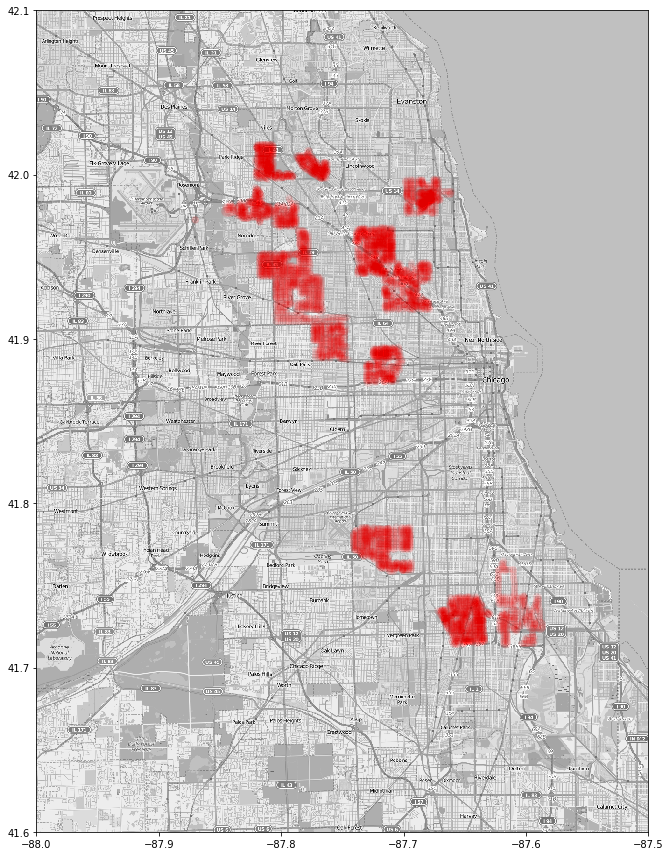

In [17]:
mapdata = np.loadtxt("../resources/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig, ax = plt.subplots(figsize=(20,7))
fig = plt.gcf()
fig.set_size_inches(16,12)

ax.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

spray_df = df[df['longitude']>-88]
sprays = spray_df[['longitude', 'latitude']].drop_duplicates().values
ax.scatter(sprays[:,0], sprays[:,1], c='r', alpha=.03)

fig.tight_layout()
plt.savefig('../plots/lat_long_scatter')

In [14]:
df_2011 = df['2011']
df_2013 = df['2013']

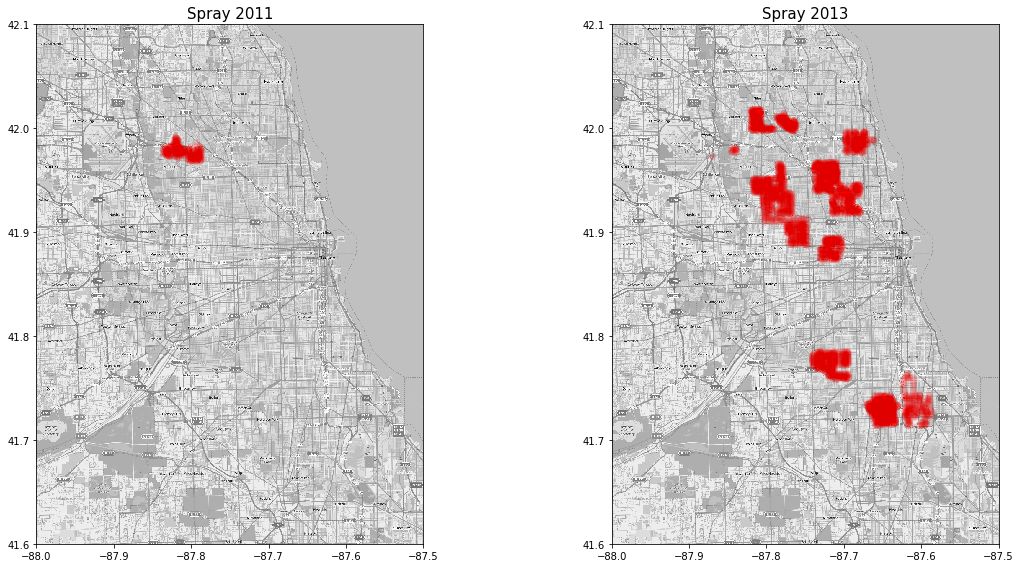

In [42]:
mapdata = np.loadtxt("../resources/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(17,8))

axes[0].imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)
axes[1].imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

spray_df_2011 = df_2011[df_2011['longitude']>-88]
spray_df_2013 = df_2013[df_2013['longitude']>-88]


sprays_11 = spray_df_2011[['longitude', 'latitude']].drop_duplicates().values
sprays_13 = spray_df_2013[['longitude', 'latitude']].drop_duplicates().values
axes[0].scatter(sprays_11[:,0], sprays_11[:,1], c='r', alpha=.03)
axes[1].scatter(sprays_13[:,0], sprays_13[:,1], c='r', alpha=.03)

axes[0].set_title('Spray 2011', fontsize = 15)
axes[1].set_title('Spray 2013', fontsize = 15)
fig.tight_layout()

plt.savefig('../plots/spray_by_year')

#### Visualizing the amount of times sprayed 

The plots below display the amount of times the spray was performed throughout the years 2011 and 2013.

In [43]:
df_times_sprayed = df.index.value_counts().sort_index().to_frame()
df_times_sprayed.head()

,date
2011-08-29,95
2011-09-07,1530
2013-07-17,2202
2013-07-25,1607
2013-08-08,1195


In [44]:
df_times_sprayed.T.values[0]

array([  95, 1530, 2202, 1607, 1195, 2668,  141, 1587, 2302,  924])

In [45]:
df_times_sprayed_11 = df_2011.index.value_counts().sort_index().to_frame()
df_times_sprayed_11.head()

,date
2011-08-29,95
2011-09-07,1530


In [46]:
df_times_sprayed_11.T.values[0]

array([  95, 1530])

In [47]:
df_times_sprayed_13 = df_2013.index.value_counts().sort_index().to_frame()
df_times_sprayed_13.head()

,date
2013-07-17,2202
2013-07-25,1607
2013-08-08,1195
2013-08-15,2668
2013-08-16,141


In [48]:
df_times_sprayed_13.T.values[0]

array([2202, 1607, 1195, 2668,  141, 1587, 2302,  924])

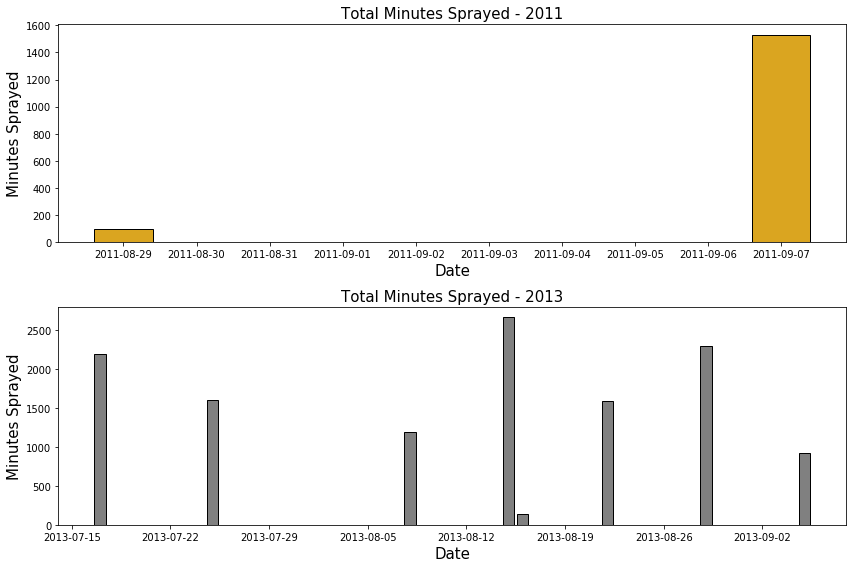

In [55]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

axes[0].bar(df_times_sprayed_11.index, df_times_sprayed_11.T.values[0], color='goldenrod', ec='k')
axes[1].bar(df_times_sprayed_13.index, df_times_sprayed_13.T.values[0], color='grey', ec='k')

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('Minutes Sprayed', fontsize=15)
axes[0].set_title('Total Minutes Sprayed - 2011', fontsize=15)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('Minutes Sprayed', fontsize=15)
axes[1].set_title('Total Minutes Sprayed - 2013', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.savefig('../plots/amount_sprayed_by_year_sub.png')

### Step # 3: Save the clean data

In [50]:
df.to_csv('../data/cleaned_spray.csv')